# Speed Up your ML training with Feature Selection using Swarm Optimizers

What if I told you, you could train your model 1000 times faster and maintain the same accuracy (slightly less or more at times) by simply dropping a few features from your dataset?

Interested? Read on!

## Defining the problem

Imagine you're working with a dataset with 10 features. Using all the 10 features, you're able to make accurate prediction 95% of times.

Now, let's assume your training algorithm has an N^3 complexity. 

Thus, to get a 95% accuracy, you'd be taking 1000 units of time to train.

Assuming that after feature selection, you are able to drop 6 features, and are able to still have a 95% accuracy with just 4 features, your training time comes down to 64 units of time. 


When I do the math, I love just spening 64 units of time (and computational effort) compared to a 1000 units.

tl;dr this is how feature selection works -

![](https://miro.medium.com/max/2400/1*68H8EsCwfqJNxzYdPYtEDw.png)

## Why Swarm Optimizers for Feature Selection?

Because they can solve your problem faster.

Swarm optimizers are a part of the **Heuristic Algorithms** family. A heuristic algorithm is one that is designed to solve a problem in a faster and more efficient fashion than traditional methods by sacrificing optimality, accuracy, precision, or completeness for speed. Heuristic algorithms often times used to solve NP-complete problems, a class of decision problems.

Swarm Intelligence systems employ large numbers of agents interacting locally with one another and the environment. Swarm intelligence refers to the collective behavior of decentralized systems and can be used to describe both natural and artificial systems. Specific algorithms for this class of system include the particle swarm optimization algorithm, the ant colony optimization algorithm, and artificial bee colony algorithm. Each of the previous algorithms was inspired by the natural, self-organized behavior of animals.

In this report, I shall be presenting you with a library of Binary Swarm Optimization algorithms, consisting of - 

* Binary Genetic Algorithm
* Binary Particle Swarm optimization
* Binary Cuckoo Search
* Binary Firefly algorithm
* Binary Bat Algorithm
* Binary Gravitational Search algorithm
* Binary Dragon Fly Algorithm

## Let's dive in!

In this report, we shall be seeing how to use the various swarm optimization algorithms presented in the library to optimize the number of features we use from our dataset. 

Our goal shall be to maximize the test accuracy of the dataset while minimizing the number of features used for training.

### Step 1 - Import the necessary modules

In [1]:
import numpy as np
from sklearn import svm
from sklearn import model_selection as ms
from tqdm import tqdm
from IPython.display import HTML
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
import binary_optimization as opt

### Step 2 - Import the dataset

In this report we're working with the **Wine Data Set** provided by UCI ML Repository. 

A brief description of the dataset - 

Using chemical analysis determine the origin of wines

![](https://raw.githubusercontent.com/xprilion/random-storage/master/devcloud/Screenshot%202021-02-21%20at%207.44.55%20PM.png)

In [3]:
with open("wine/0.6/wine_train_data_testrate0.6.txt") as f:
    tr_d=np.array([[float(d) for d  in data.split(',')] for data in f.read().splitlines()])
    
with open("wine/0.6/wine_test_data_testrate0.6.txt") as f:
    te_d=np.array([[float(d) for d  in data.split(',')] for data in f.read().splitlines()])

with open("wine/0.6/wine_train_label_testrate0.6.txt") as f:
    tr_l=np.array([int(data) for data in f.read().splitlines()])

with open("wine/0.6/wine_test_label_testrate0.6.txt") as f:
    te_l=np.array([int(data) for data in f.read().splitlines()])

### Step 3 - Define a scoring function

In [4]:
def test_score(gen,tr_x,tr_y,te_x,te_y):
    clf = svm.LinearSVC()
    mask=np.array(gen) == 1
    al_data=np.array(tr_x[:,mask])
    al_test_data=np.array(te_x[:,mask])
    return np.mean([svm.LinearSVC().fit(al_data,tr_y).score(al_test_data,te_y) for i in range(4)])

### Step 4 - Create an evaluation object which uses the scoring function for maxmization

In [5]:
class Evaluate:
    def __init__(self):
        self.train_l = tr_l
        self.train_d = tr_d
        self.K = 4
    def evaluate(self,gen):
        mask=np.array(gen) > 0
        al_data=np.array([al[mask] for al in self.train_d])
        kf = ms.KFold(n_splits=self.K)
        s = 0
        for tr_ix,te_ix in kf.split(al_data):
            s+= svm.LinearSVC().fit(al_data[tr_ix],self.train_l[tr_ix]).score(al_data[te_ix],self.train_l[te_ix])#.predict(al_test_data)
        s/=self.K
        return s
    def check_dimentions(self,dim):
        if dim==None:
            return len(self.train_d[0])
        else:
            return dim

### Step 5 - Let's run it!

Algorithm:
	best_features         best_val      number_of_1s      test_score
BGA:
	0101001001110          0.915850           6             0.899533


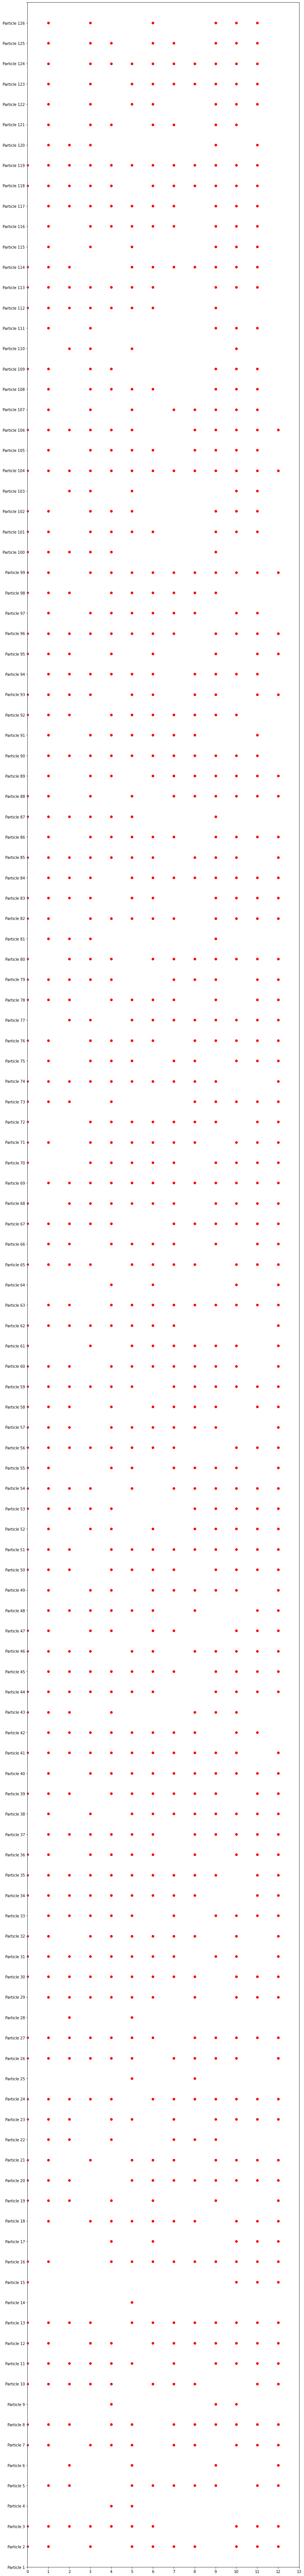

In [6]:
print("Algorithm:\n\t{0}         {1}      {2}      {3}".format("best_features","best_val","number_of_1s", "test_score"))

s,g,l,a=opt.BGA(Eval_Func=Evaluate,n=20,m_i=100)
print("BGA:\n\t{0}          {1:.6f}           {2}             {3:.6f}".format("".join(map(str,g)),s,l,
                                           test_score(g,tr_d,tr_l,te_d,te_l)))
# s,g,l=opt.BPSO(Eval_Func=Evaluate,n=20,m_i=200)
# print("BPSO:\n\t{0}   {1:.6f}  {2}  {3:.6f}".format("".join(map(str,g)),s,l,
#                                       test_score(g,tr_d,tr_l,te_d,te_l)))
# s,g,l=opt.BCS(Eval_Func=Evaluate,n=20,m_i=200)
# print("BCS:\n\t{0}   {1:.6f}  {2}  {3:.6f}".format("".join(map(str,g)),s,l,
#                                      test_score(g,tr_d,tr_l,te_d,te_l)))
# s,g,l=opt.BFFA(Eval_Func=Evaluate,n=20,m_i=10)
# print("BFFA:\n\t{0}   {1:.6f}  {2}  {3:.6f}".format("".join(map(str,g)),s,l,
#                                       test_score(g,tr_d,tr_l,te_d,te_l)))
# s,g,l=opt.BBA(Eval_Func=Evaluate,n=20,m_i=200)
# print("BBA:\n\t{0}   {1:.6f}  {2}  {3:.6f}".format("".join(map(str,g)),s,l,
#                                      test_score(g,tr_d,tr_l,te_d,te_l)))
# s,g,l=opt.BGSA(Eval_Func=Evaluate,n=20,m_i=200)
# print("BGSA:\n\t{0}   {1:.6f}  {2}  {3:.6f}".format("".join(map(str,g)),s,l,
#                                       test_score(g,tr_d,tr_l,te_d,te_l)))
# s,g,l=opt.BDFA(Eval_Func=Evaluate,n=20,m_i=200)
# print("BDFA:\n\t{0}   {1:.6f}  {2}  {3:.6f}".format("".join(map(str,g)),s,l,
#                                       test_score(g,tr_d,tr_l,te_d,te_l)))


In [7]:
HTML(a.to_html5_video())

CalledProcessError: Command '['ffmpeg', '-f', 'rawvideo', '-vcodec', 'rawvideo', '-s', '936x9072', '-pix_fmt', 'rgba', '-r', '5.0', '-loglevel', 'error', '-i', 'pipe:', '-vcodec', 'h264', '-pix_fmt', 'yuv420p', '-y', '/var/folders/xn/gfrhg7hx6zndtnfwb8qlp4qh0000gn/T/tmpeatlqdqj/temp.m4v']' returned non-zero exit status 255.